카이제곱 관련 쓰려면
pip install pandas matplotlib scipy

seaborn 없으면 
pip install seaborn

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
from scipy.stats import chi2_contingency

In [79]:
Mush = pd.read_csv('Mushroom.csv')
Mush
Mush['stalk_root'] = Mush['stalk_root'].replace("missing", np.NAN)
Mush.dropna(axis = 0, inplace = True)


In [80]:
Mush = Mush[['poison', "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring", "stalk_color_above_ring", "stalk_color_below_ring"]]   # 사용할 칼럼 리스트 넣어서 쓰면 됩니다.
Mush

,poison,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring
0,poison,enlarging,equal,smooth,smooth,white,white
1,enable,enlarging,club,smooth,smooth,white,white
2,enable,enlarging,club,smooth,smooth,white,white
3,poison,enlarging,equal,smooth,smooth,white,white
4,enable,tapering,equal,smooth,smooth,white,white
...,...,...,...,...,...,...,...
7986,enable,enlarging,bulbous,scaly,scaly,brown,brown
8001,enable,enlarging,bulbous,scaly,scaly,brown,brown
8038,enable,enlarging,bulbous,smooth,smooth,white,white
8095,poison,enlarging,club,silky,scaly,cinnamon,cinnamon


In [81]:
# chi2_contingency << 교차표 제작 후 해당 교차표를 변수로 사용 시 카이제곱한 결과 출력
# statistic이 카이제곱 검정값, 관측 빈도와 기대 빈도 간 차이 의미 // 해당 값으로는 결론 불가능
# p-value = 본판, 0.05 보다 작다면 두 변수간의 관계가 유의미하다고 볼 수 있다. 연관성 의미
# dof = 자유도
# 4개의 요소로 이루어진 튜플형식으로 나온다. 카이제곱 검정값, pvalue, 자유도, 무슨 ... 기대 어쩌고 리스트 뭉탱이

# crosstab :  두 변수에 대한 교차표 만드는 함수 // 두 개 이상의 데이터 배열에 대한 단순 교차표를 계산
# odor = pd.crosstab(Mush['cap_shape'], Mush['poison'])
# print(chi2_contingency(odor))
# type(chi2_contingency(odor))

In [82]:
def poison_chi_def(col):
    temp = pd.crosstab(Mush[col], Mush['poison'])
    temp_chi = chi2_contingency(temp)[0]
    temp_p_value = chi2_contingency(temp)[1]
    return temp_chi, temp_p_value

In [83]:
for i in list(Mush.columns[1:]):
    print("독성 -", end=" ")
    print("{:<20}".format(i), end=" ")
    print(f": 카이제곱 검증값 {poison_chi_def(i)[0]},   p-value {round(poison_chi_def(i)[1],2)}", end= " ")
    if poison_chi_def(i)[1] < 0.05:
        print("유효")
    else:
        print("버려야함.")

독성 - stalk_shape          : 카이제곱 검증값 1978.5597725705425,   p-value 0.0 유효
독성 - stalk_root           : 카이제곱 검증값 638.2637626946303,   p-value 0.0 유효
독성 - stalk_surface_above_ring : 카이제곱 검증값 2836.025476601987,   p-value 0.0 유효
독성 - stalk_surface_below_ring : 카이제곱 검증값 2732.5177020579317,   p-value 0.0 유효
독성 - stalk_color_above_ring : 카이제곱 검증값 1975.8574919610573,   p-value 0.0 유효
독성 - stalk_color_below_ring : 카이제곱 검증값 1819.0732186368086,   p-value 0.0 유효


In [84]:
def hitmap_chi(col):
    sns.heatmap(col, annot=True, cmap="YlGnBu")
    plt.title(f"{col}")
    plt.show()

In [85]:
# sns.heatmap(pd.crosstab(Mush['odor'], Mush['poison']), annot=True, cmap="YlGnBu")
# plt.title("Odor - Poison")
# plt.show()

# sns.heatmap(crosstab_bruises, annot=True, cmap="YlGnBu")
# plt.title("Bruises - Poison")
# plt.show()

In [86]:
def just_cross(col):
    col = str(col)
    a = pd.crosstab(Mush[col], Mush['poison'])
    return a

In [87]:
# col = 'odor'
# print(just_cross(col))

In [88]:
# axes 위치조정 테스트
row = 3
col = 2
idx = 0
test_list = []
ax_1= 0
ax_2 = 0
# for c in list(Mush.columns[1:]):
for c in range(6):
    if idx % col == 0 :
        ax_1 += 1

    if idx / col in range(1,5) :
        ax_2 = 0
    print(f'axes[{ax_1-1},{ax_2}]')
    ax_2 += 1   # 더하다가 0되는 순간 0
    idx += 1

    test_list.append(f'axes[{ax_1-1},{ax_2}]')

axes[0,0]
axes[0,1]
axes[1,0]
axes[1,1]
axes[2,0]
axes[2,1]


In [89]:
def subplot_maker(row,col):
    row = int(row)
    col = int(col)
    axes_list = []

    fig, axes = plt.subplots(row, col, figsize=(row*4, col*8))  # 서브플롯 판 제작  # 사이즈 보고 알아서 비율 맞출 것.....
    fig.suptitle('독성과 각 변수간 카이제곱', fontsize = 15 )       # 서브플롯 타이틀 
 
    idx = 0 #   # axes 위치잡는용
    ax_1 = 0
    ax_2 = 0

    # Mush 데이터 프레임 자체 칼럼 값으로 제작. list 형식만 바꾼다면 그 리스트 값에 맞는 칼럼만 들고와서 표 제작.
    for c in list(Mush.columns[1:]):
        if idx % col == 0 :
            ax_1 += 1
        if idx / col in range(1,100) :
            ax_2 = 0

        axes_list.append(f'axes[{ax_1-1},{ax_2}]')
        temp = axes[ax_1-1, ax_2]
        axes[ax_1-1, ax_2].set_title(c)
        ax_2 += 1
        idx += 1   

        idx_ax = 0

        sns.heatmap(just_cross(c), annot=True, cmap="YlGnBu", ax=temp)
        idx_ax += 1

    # plt.subplots_adjust(left=0.07, right=0.93, top=0.92, bottom=0.18, wspace=0.3, hspace=0.3) # 아래코드와 효과는 같으나 하나하나 값 부여해야해서 일단 주석처리.
    plt.tight_layout(pad=3.0)   # 레이아웃 타이틀, 레이블 겹치지 않게 조정하는 용 

    plt.show()


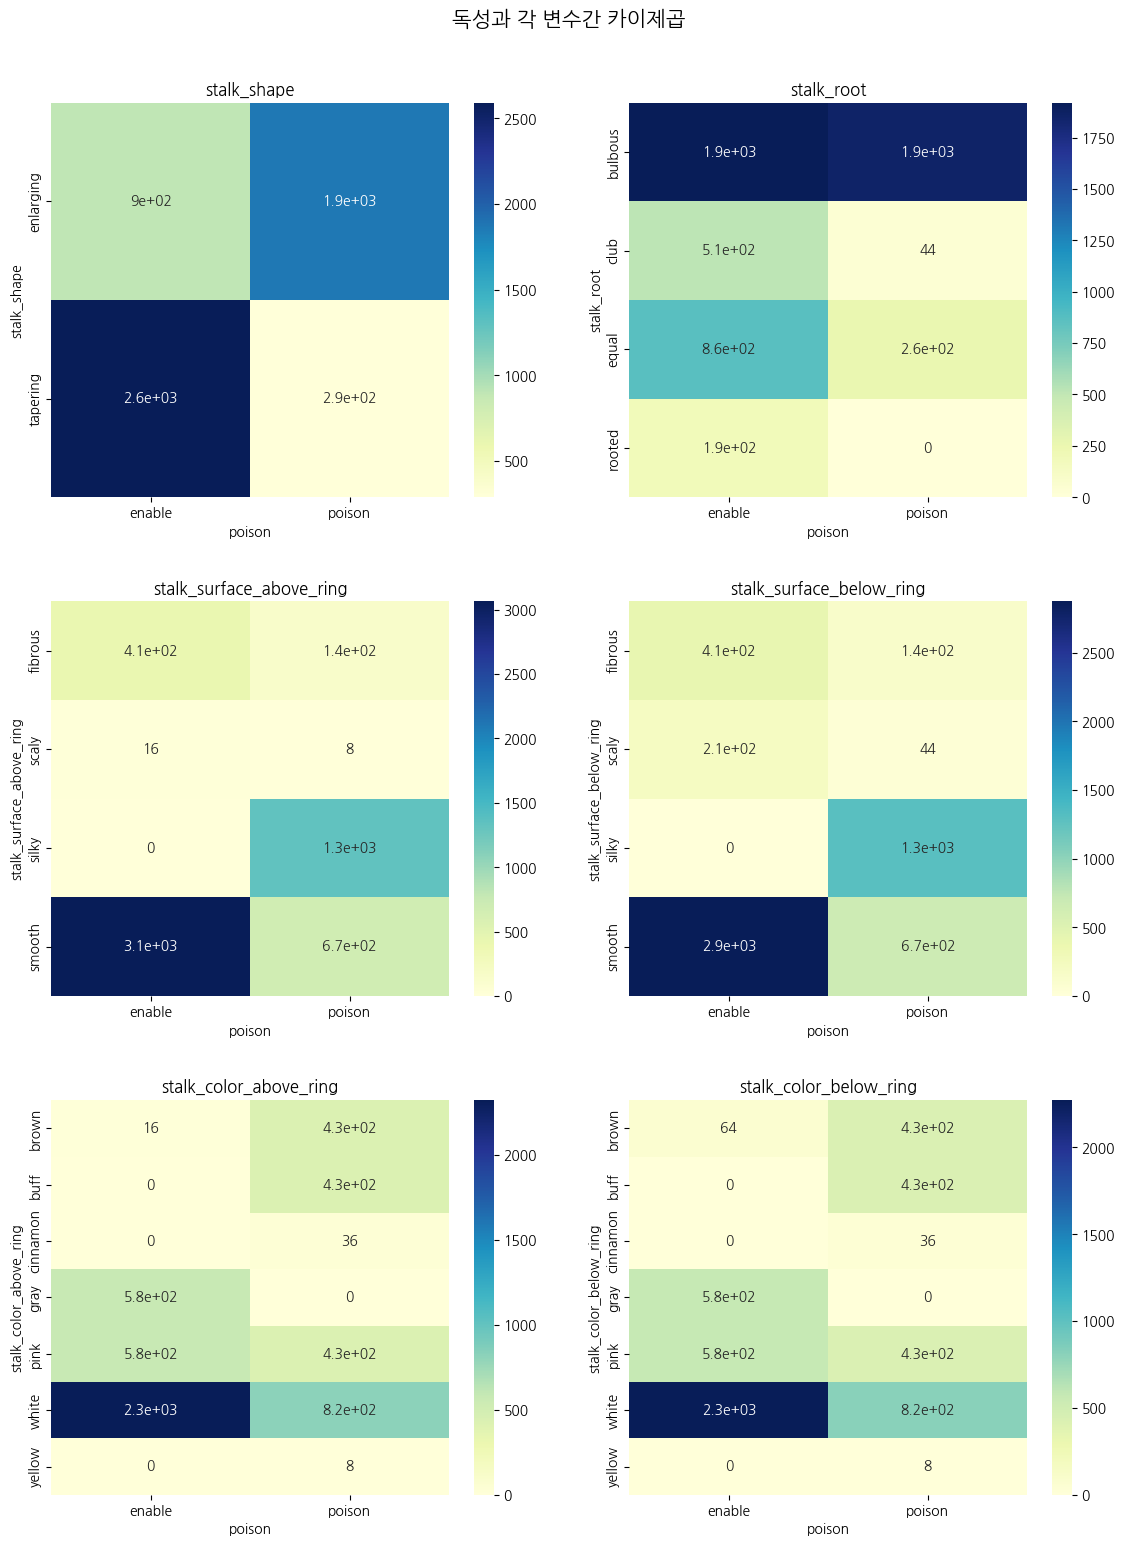

In [90]:
subplot_maker(3,2)  # 몇행 / 몇줄로 만들것인가 입력